In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

In [3]:
CURRENT_DIR = pathlib.Path(".").resolve()
DATA_DIR = CURRENT_DIR.joinpath("data",'raw')
DATA_DIR.exists()

True

In [5]:
data = pd.read_csv(f'{DATA_DIR}/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
print("Número de datapoints\n", data.shape)
data.isnull().sum()
print("Número actualizado de datapoints\n", data.shape)

Número de datapoints
 (768, 9)
Número actualizado de datapoints
 (768, 9)


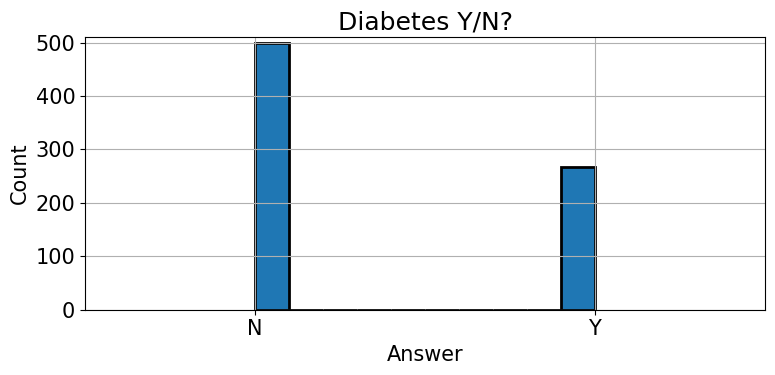

In [8]:
# Ajustar el tamaño de fuente.
plt.rcParams['font.size'] = 15 

# Crear una figura y ajusta su tamaño.
#f = plt.figure(figsize=(8,4))

# Crear un subplot o subtrama - al ser una sola figura es 1,1,1.
#ax = f.add_subplot(1,1,1)

fig, ax = plt.subplots(figsize=(8,4))

# Gráfica tus datos usando 'hist'. Pasa el objeto 'ax' a Pandas. Agrega un borde negro con un groso de 2.
data["Outcome"].hist(ax=ax, edgecolor='black', linewidth=2)

# Establece los límites en el eje x.
ax.set_xlim([-0.5, 1.5])

# Establece la frecuencia de tick. Tenemos 0 y 1 que corresponden a Sí y No respectivamente.
ax.set_xticks([0, 1])

# Etiquetar xtick labels.
ax.set_xticklabels(["N", "Y"])

# Crea el título.
ax.set_title("Diabetes Y/N?")

# Establece la etiqueta del eje X.
ax.set_xlabel("Answer")

# Establece la etiqueta del eje Y.
ax.set_ylabel("Count")

# Establece los límites superior/inferior del eje y.
ax.set_ylim([0, 510])

# Mace que las cosas sean bonitas, no es necesario, pero se ajusta al tamaño de la figura.
fig.tight_layout()

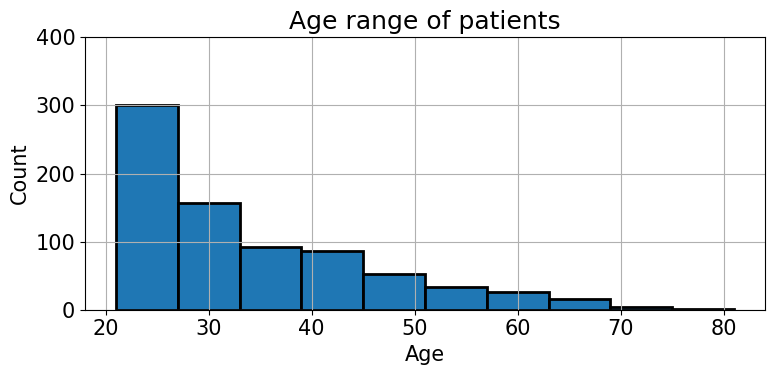

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
data["Age"].hist(ax=ax, edgecolor='black', linewidth=2,stacked=True)
ax.set_title("Age range of patients")
ax.set_ylim([0, 400])
ax.set_xlabel("Age")
ax.set_ylabel("Count")
fig.tight_layout()

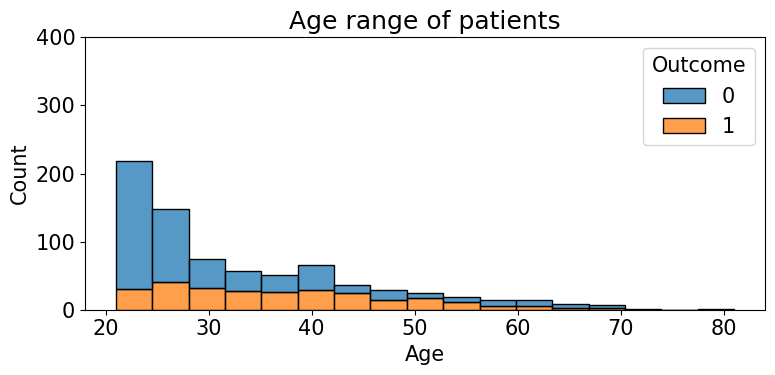

In [10]:
fig, axsns = plt.subplots(figsize=(8,4))
sns.histplot(data=data,
             x=data.Age,
             hue=data.Outcome,
             multiple='stack',
             ax=axsns)
axsns.set_title("Age range of patients")
axsns.set_ylim([0, 400])
axsns.set_xlabel("Age")
axsns.set_ylabel("Count")
fig.tight_layout()

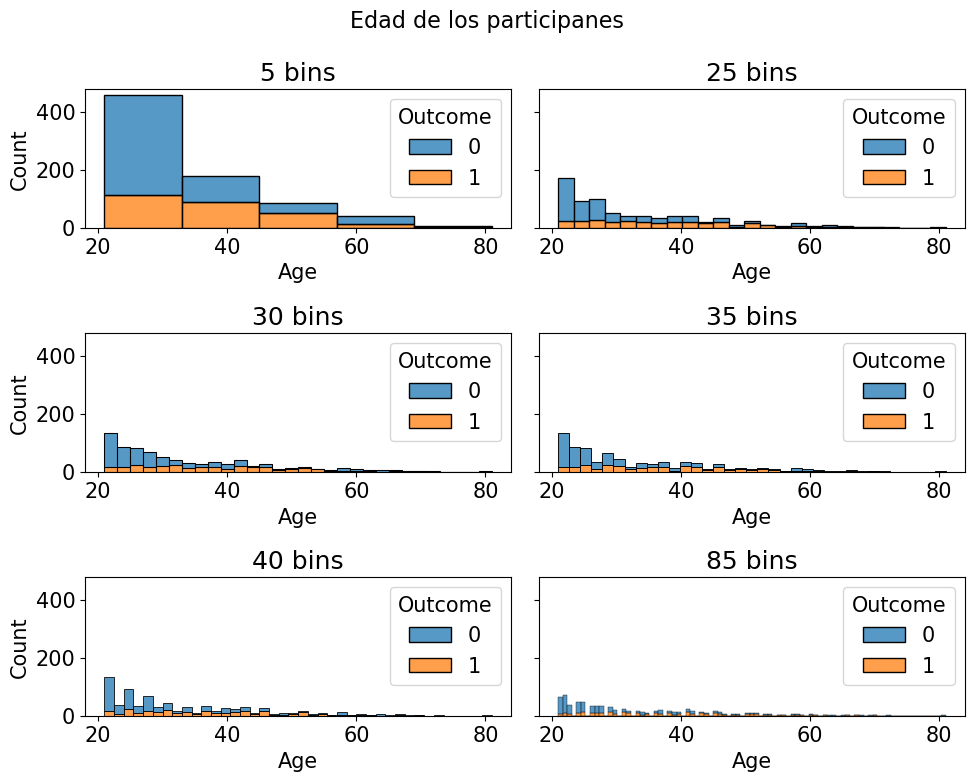

In [33]:
binvalues = [5, 25, 30, 35, 40, 85]
fig, axsns = plt.subplots(3,2,figsize=(10,8), sharey=True)
fig.suptitle('Edad de los participanes', fontsize=16)
for i, ax in enumerate(axsns.flat):
    sns.histplot(data=data,
                x=data.Age,
                hue=data.Outcome,
                multiple='stack',
                bins=binvalues[i],
                ax=ax)
    ax.set_title(f'{binvalues[i]} bins')
fig.tight_layout()   
plt.show()

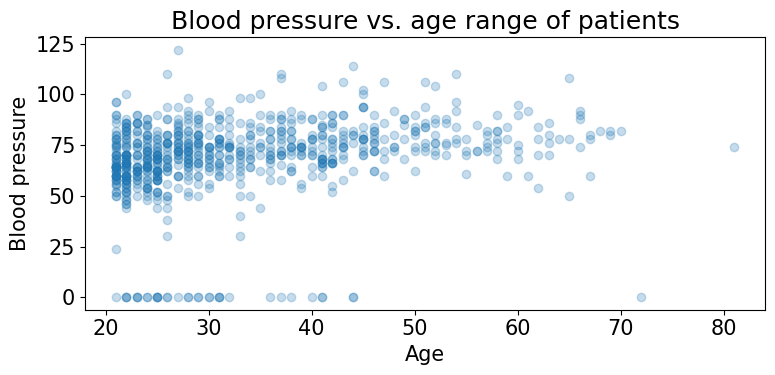

In [34]:
plt.rcParams['font.size'] = 15 
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(data["Age"], data["BloodPressure"], alpha=0.25)
ax.set_title("Blood pressure vs. age range of patients")
ax.set_ylabel("Blood pressure")
ax.set_xlabel("Age")
f.tight_layout() 

In [35]:
# Seleccionar las filas donde el valor es mayor a 0.
data = data[data["BloodPressure"] > 0]
print("Patients with blood pressure\n", data.shape) # Rows x Columns

Patients with blood pressure
 (733, 9)


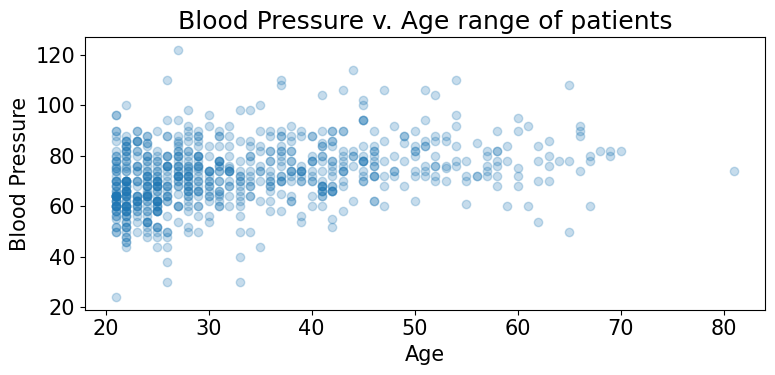

In [37]:
plt.rcParams['font.size'] = 15 
f = plt.figure(figsize=(8,4))
ax = f.add_subplot(1,1,1)
ax.scatter(data["Age"], data["BloodPressure"], alpha=0.25)
ax.set_title("Blood Pressure v. Age range of patients")
ax.set_ylabel("Blood Pressure")
ax.set_xlabel("Age")
f.tight_layout() # Makes things pretty

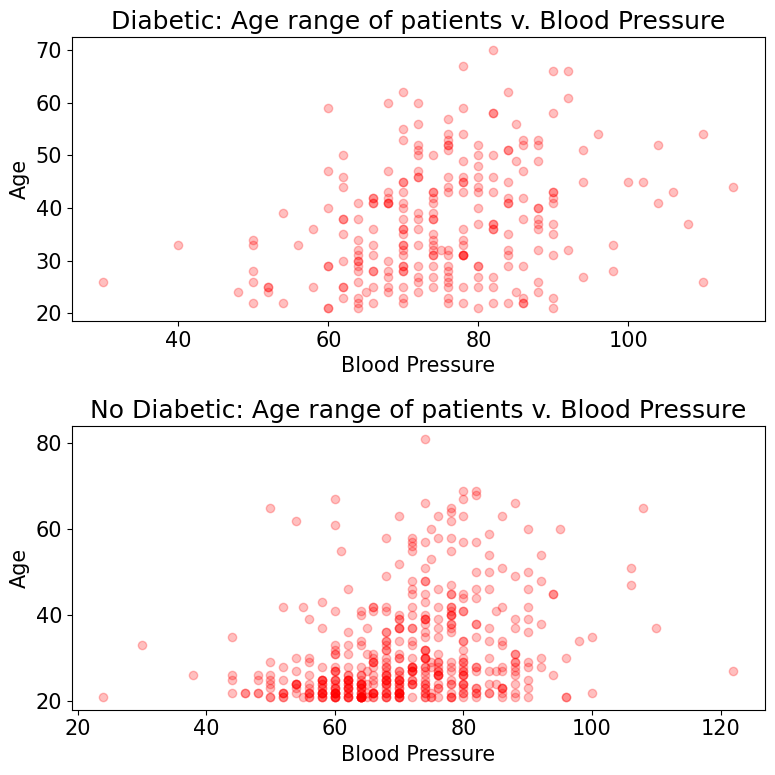

In [41]:
diabetic = data[data["Outcome"] == 1]
notdiabetic = data[data["Outcome"] == 0]

plt.rcParams['font.size'] = 15 
f = plt.figure(figsize=(8,8))
ax = f.add_subplot(2,1,1)
ax.scatter(diabetic["BloodPressure"], diabetic["Age"], alpha=0.25, c='r')
ax.set_title("Diabetic: Age range of patients v. Blood Pressure")
ax.set_ylabel("Age")
ax.set_xlabel("Blood Pressure")

ax1 = f.add_subplot(2,1,2)
ax1.scatter(notdiabetic["BloodPressure"], notdiabetic["Age"], alpha=0.25, c='r')
ax1.set_title("No Diabetic: Age range of patients v. Blood Pressure")
ax1.set_ylabel("Age")
ax1.set_xlabel("Blood Pressure")

f.tight_layout() 